                     Valor
Data                      
2021-11-22 00:00:00      6
2021-11-22 00:01:00      6
2021-11-22 00:02:00      3
2021-11-22 00:03:00      6
2021-11-22 00:04:00      6


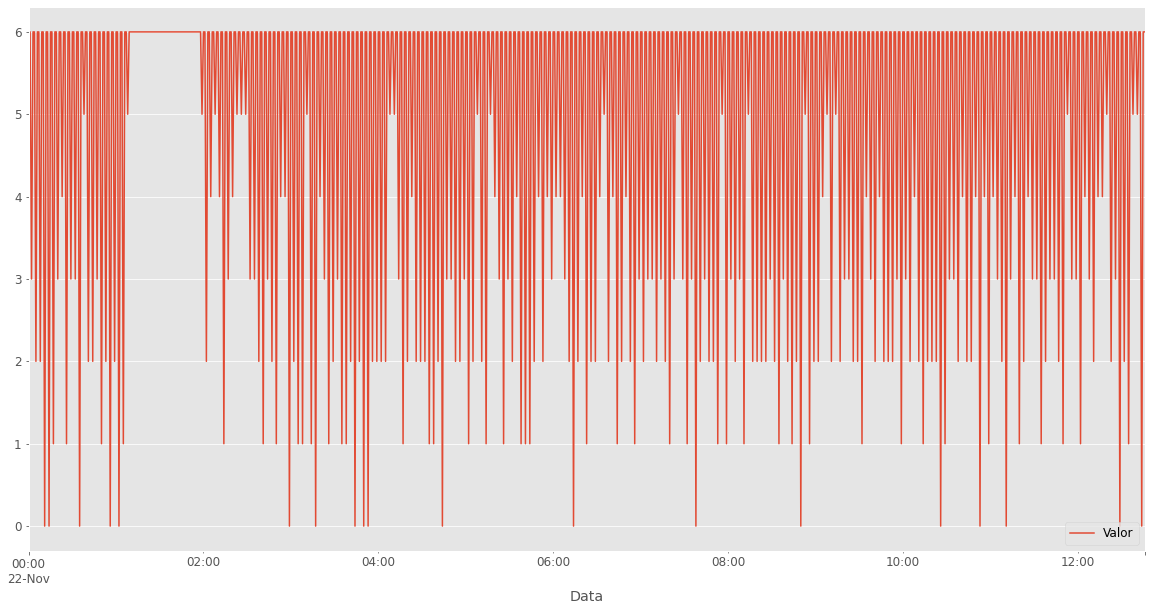

In [51]:
import pandas as pd

from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (20.0, 10.0)
pyplot.rcParams.update({'font.size': 12})


series = pd.read_excel(r'C:\Users\marci\Desktop\ProjetoPrevisaoTemporal\database.xlsx', thousands=',', sheet_name="database", engine='openpyxl', index_col='Data')
print(series.head())
series.plot()
pyplot.show()


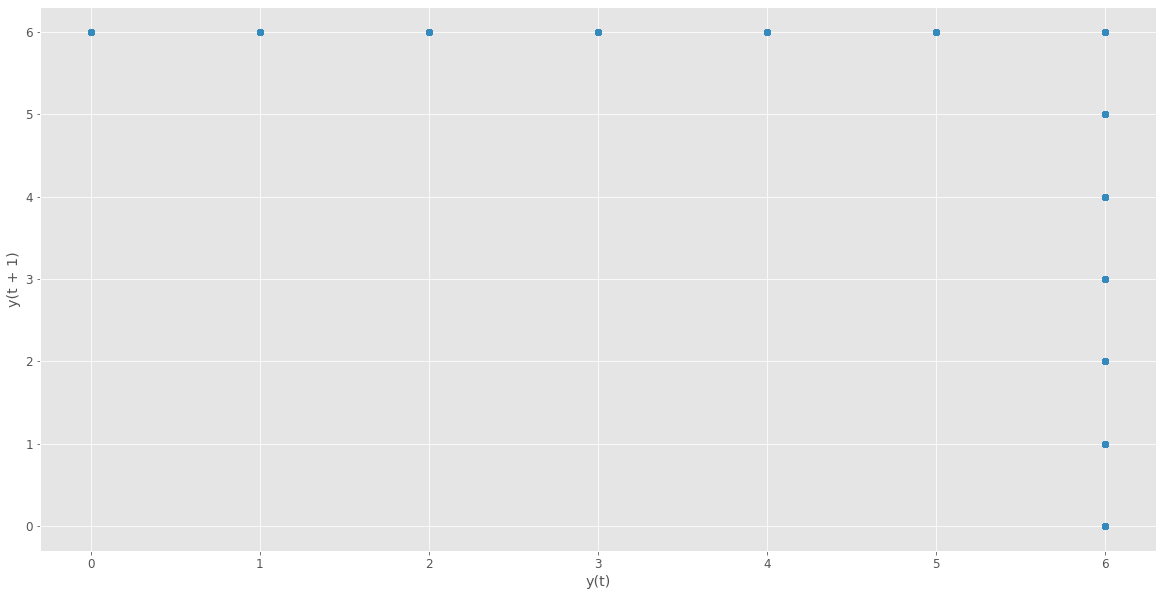

In [52]:
from pandas.plotting import lag_plot

lag_plot(series)
pyplot.show()

In [53]:

from pandas import DataFrame
from pandas import concat

values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000 -0.372941
t+1 -0.372941  1.000000


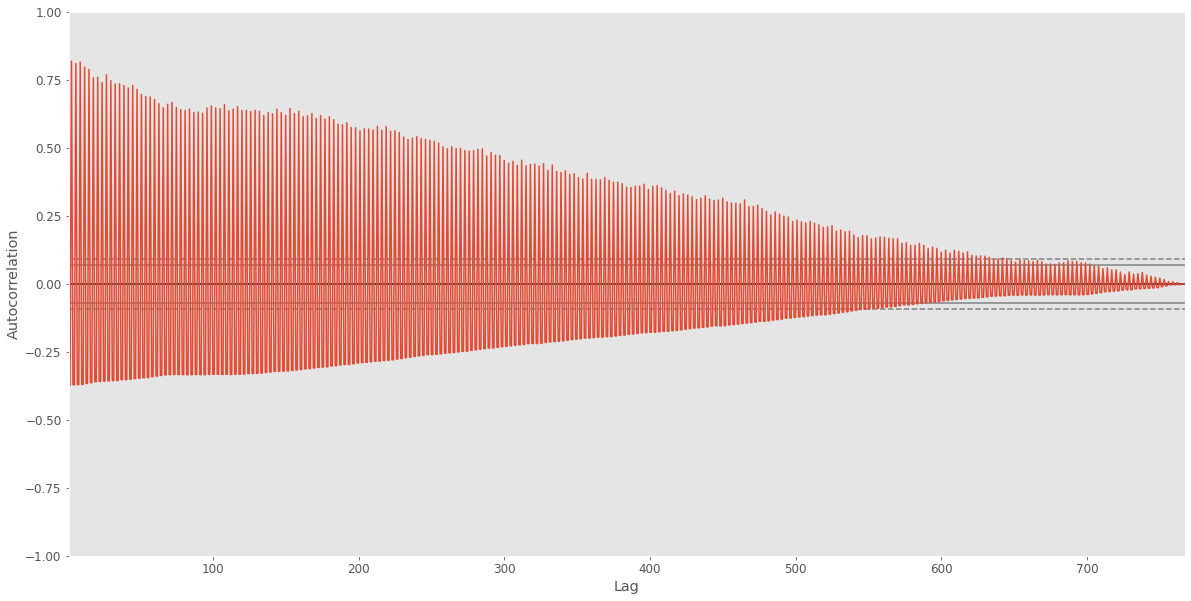

In [54]:

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

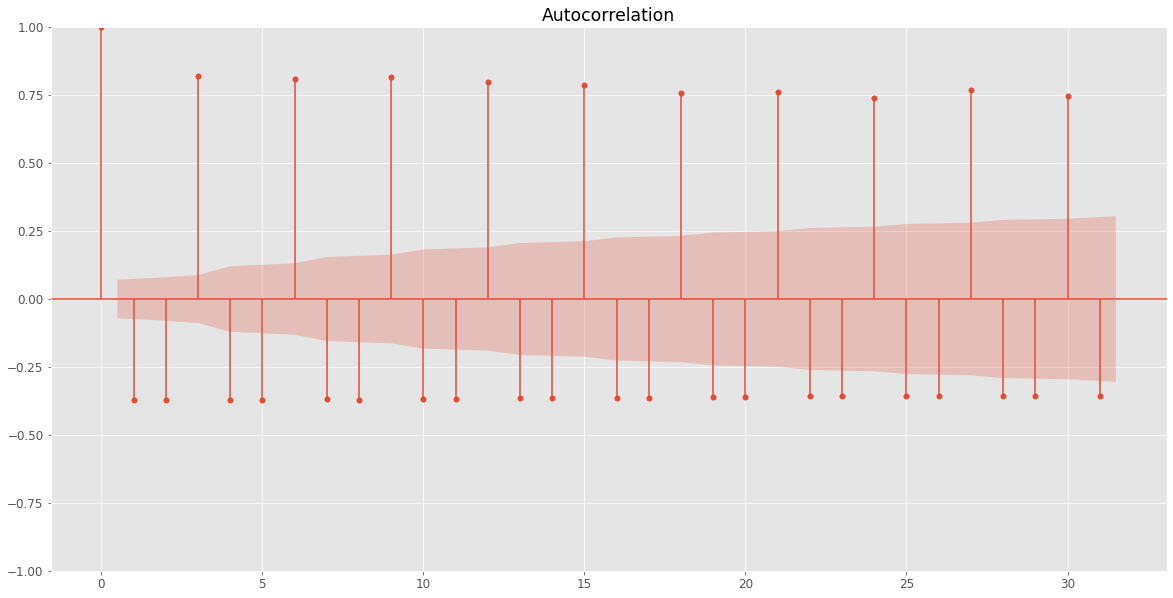

In [55]:

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=31)
pyplot.show()

predicted=5.967155, expected=6.000000
predicted=2.656507, expected=2.000000
predicted=5.968403, expected=6.000000
predicted=5.969570, expected=6.000000
predicted=3.094570, expected=0.000000
predicted=6.028616, expected=6.000000
predicted=6.027737, expected=6.000000
predicted=1.690408, expected=3.000000
predicted=6.017259, expected=6.000000
predicted=6.017809, expected=6.000000
predicted=2.878345, expected=4.000000
predicted=5.985389, expected=6.000000
predicted=5.984945, expected=6.000000
predicted=1.713817, expected=1.000000
predicted=6.020065, expected=6.000000
predicted=6.019766, expected=6.000000
predicted=2.822222, expected=2.000000
predicted=5.992350, expected=6.000000
predicted=5.992309, expected=6.000000
predicted=1.965894, expected=4.000000
predicted=5.989081, expected=6.000000
predicted=5.988797, expected=6.000000
predicted=2.963753, expected=3.000000
predicted=5.960129, expected=6.000000
predicted=5.959994, expected=6.000000
predicted=2.988709, expected=3.000000
predicted=5.

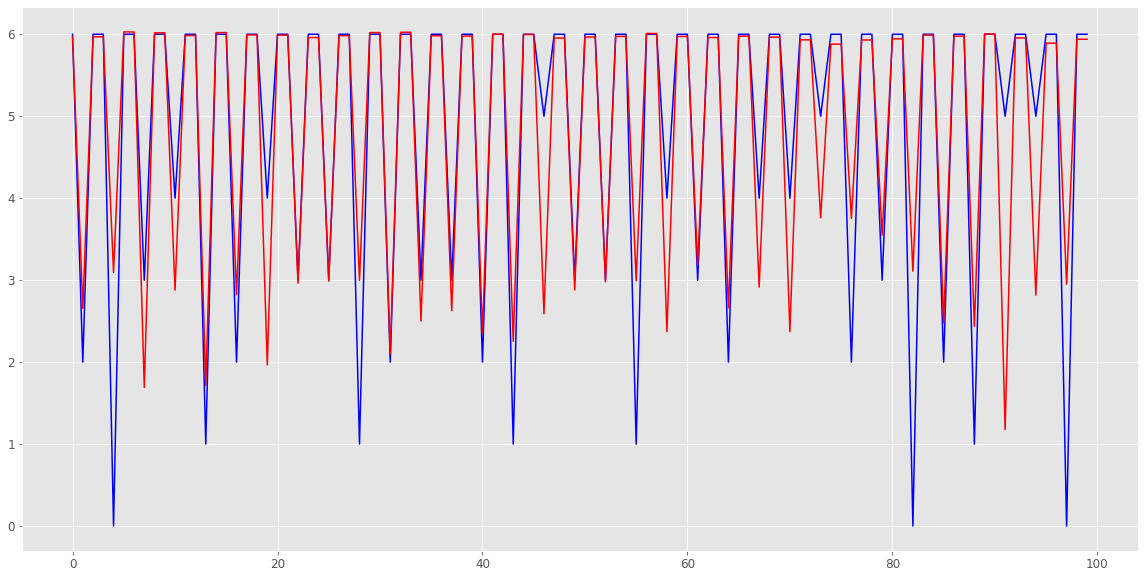

In [56]:

from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# split dataset
X = series.values
train, test = X[1:len(X)-100], X[len(X)-100:]
# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test, color='blue')
pyplot.plot(predictions, color='red')
pyplot.show()

C:\Users\marci\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  warnings.warn('No frequency information was'


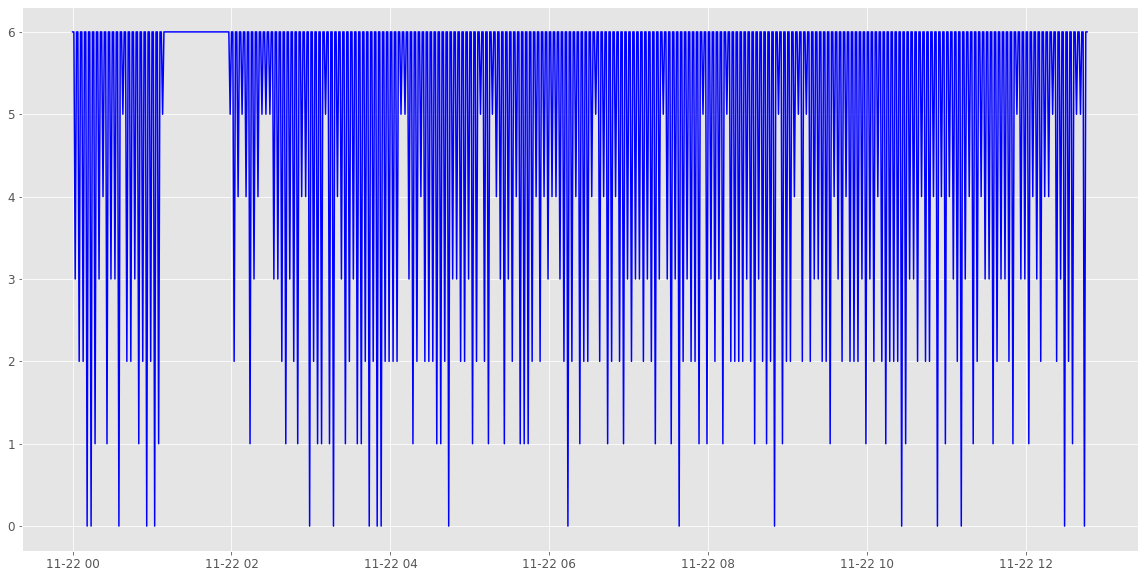

In [57]:

# train autoregression
model = AutoReg(series, lags=29)
model_fit = model.fit()

# plot
pyplot.plot(series, color='blue')
# pyplot.plot(series, color='red')
pyplot.show()

In [59]:
#Exportando a tabela tratada em arquivo .csv no local definido:

predictions.to_csv(r'C:\Users\marci\Desktop\forecast.csv', index=True, decimal=',')

AttributeError: 'list' object has no attribute 'to_csv'